In [1]:
print("Hello Kyso")


Hello Kyso


In [3]:
print("I'm just testing, how Kyso works!")

I'm just testing, how Kyso works!


range(1, 60) [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


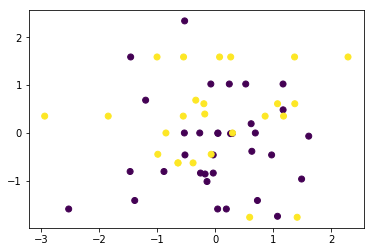

In [5]:

from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import cross_val_predict


# load the model from disk
filename = 'CombinedModel.sav'
estimator = pickle.load(open(filename, 'rb'))

dataset = pd.read_excel('IVF data sheet (with integral values).xlsx', sheet_name='TopFeaturesCombined')
dataset = dataset.fillna(dataset.mean())
dataset1 = dataset
# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the feature data and transform
X_std = sc.fit_transform(dataset[dataset.columns[:-1]])
X_std = pd.DataFrame(X_std)
y = dataset[dataset.columns[-1]]

dataset = pd.concat([X_std, y], axis=1)

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validated:
predicted = cross_val_predict(estimator, dataset, y, cv=5)
n = range(1, 60)
print(n, predicted)
fig, ax = plt.subplots()
ax.scatter(X_std.loc[:, 0], X_std.loc[:, 5], c=predicted)
for i, txt in enumerate(n):
    ax.annotate(txt, (X_std.loc[i, 0], X_std.loc[i, 5]))
# plt.show()


# plt.figure()
# plt.scatter(y, predicted)
# plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
# # plt.set_xlabel('Measured')
# # plt.set_ylabel('Predicted')
# plt.show()
